In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt
import textwrap

from pprint import pprint
from fake_useragent import UserAgent
from sklearn.preprocessing import StandardScaler
from pyopt.client import PriceHistory
from scipy.optimize import minimize #import again

# Set some display options Pandas
pd.set_option("display.max_colwidth",None)
pd.set_option("expand_frame_repr",False)


In [2]:
# Define the symbols
symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "PEP", "NFLX", "ADBE",
    "AVGO", "CSCO", "TXN", "COST", "QCOM", "AMD", "INTC", "PYPL", "AMAT", "SBUX",
    "HON", "BKNG", "TMUS", "ZM", "ISRG", "MRVL", "WMT", "LRCX", "MDLZ", "SNPS",
    "GILD", "ILMN", "KLAC", "CDNS", "CSX", "ADP", "XEL", "IDXX", "MCHP", "ADI",
    "WDAY", "MNST", "MAR", "PANW", "ORLY", "ROST", "EXC", "WBA", "LULU", "UBER",
    "DOCU", "ROKU", "SQ", "PDD", "BIDU", "JD", "RBLX", "CRWD", "FSLY", "WIX",
    "FANG", "RNG", "GME", "NIO", "PLTR", "SOFI", "MELI", "PINS", "ETSY", "ARLO",
    "SE", "TELL", "ABNB", "DDOG", "TEAM", "MNDY", "W", "JAZZ", "VEEV", "U",
    "CHWY", "FIVN", "CFLT", "BILL", "FICO", "HUBS", "LYFT", "MRNA", "TTD",
    "OKTA", "STNE", "NET", "SHOP", "BABA"
]


# Define risk free rate
rfr = 0.05

# Grab the number of Stocks in our Portfolio
number_of_symbols = len(symbols)

# Path to the CSV file
csv_file_path = r"C:\Users\pengx\Python\Portfolio Optimization\portfolio-optimization\data\stock_data.csv"

# If data from stock_data csv does not exist

# Generate a user agent
user_agent = UserAgent().chrome

# Define period as num_months
num_months = 120

# Initialize the PriceHistory Client and Define num_months of backtest data to draw from
price_history_client = PriceHistory(symbols=symbols, user_agent=user_agent, num_months=num_months)

# Retrieve from_date and to_date from the PriceHistory instance
from_date = price_history_client.from_date.strftime("%Y-%m-%d")
to_date = price_history_client.to_date.strftime("%Y-%m-%d")

user_agent=UserAgent().chrome

# Grab Data and Dump into a CSV File
price_history_client.price_data_frame.to_csv(csv_file_path, index=False)
# display(price_history_client.price_data_frame)

# Grab the data frame
price_data_frame: pd.DataFrame = price_history_client.price_data_frame

print(price_data_frame.head())


2014-08-25
2024-08-25
AAPL MSFT GOOGL AMZN TSLA NVDA META PEP NFLX ADBE AVGO CSCO TXN COST QCOM AMD INTC PYPL AMAT SBUX HON BKNG TMUS ZM ISRG MRVL WMT LRCX MDLZ SNPS GILD ILMN KLAC CDNS CSX ADP XEL IDXX MCHP ADI WDAY MNST MAR PANW ORLY ROST EXC WBA LULU UBER DOCU ROKU SQ PDD BIDU JD RBLX CRWD FSLY WIX FANG RNG GME NIO PLTR SOFI MELI PINS ETSY ARLO SE TELL ABNB DDOG TEAM MNDY W JAZZ VEEV U CHWY FIVN CFLT BILL FICO HUBS LYFT MRNA TTD OKTA STNE NET SHOP BABA         date  close    volume   open   high     low symbol
0 2024-08-23  85.41  17318000  84.90  85.79  84.360   BABA
1 2024-08-22  82.96   9728952  83.50  83.79  81.830   BABA
2 2024-08-21  83.53  14689960  81.85  83.80  81.710   BABA
3 2024-08-20  81.04  17880060  82.46  82.60  80.775   BABA
4 2024-08-19  83.91  14750990  83.98  84.90  83.490   BABA


symbol         AAPL  ABNB   ADBE     ADI      ADP    AMAT   AMD     AMZN  ARLO    AVGO  ...   U  UBER   VEEV   W    WBA   WDAY    WIX      WMT    XEL  ZM
date                                                                                    ...                                                              
2014-08-25  25.3850   NaN  71.82  51.930  73.5047  22.115  4.18  16.7010   NaN  7.5770  ... NaN   NaN  24.60 NaN  60.79  89.00  16.92  25.2300  31.57 NaN
2014-08-26  25.2222   NaN  71.53  52.210  73.6805  22.230  4.19  17.0915   NaN  7.5955  ... NaN   NaN  24.94 NaN  60.93  90.78  16.74  25.1733  31.25 NaN
2014-08-27  25.5325   NaN  71.55  51.025  73.5486  22.630  4.16  17.1590   NaN  7.6160  ... NaN   NaN  25.21 NaN  60.53  90.30  16.50  25.2833  31.62 NaN
2014-08-28  25.5625   NaN  71.37  51.290  73.3992  22.800  4.14  17.0010   NaN  7.6360  ... NaN   NaN  24.96 NaN  60.47  85.89  16.23  25.3000  31.84 NaN
2014-08-29  25.6250   NaN  71.90  51.120  73.3816  23.105  4.17  16.9520   N

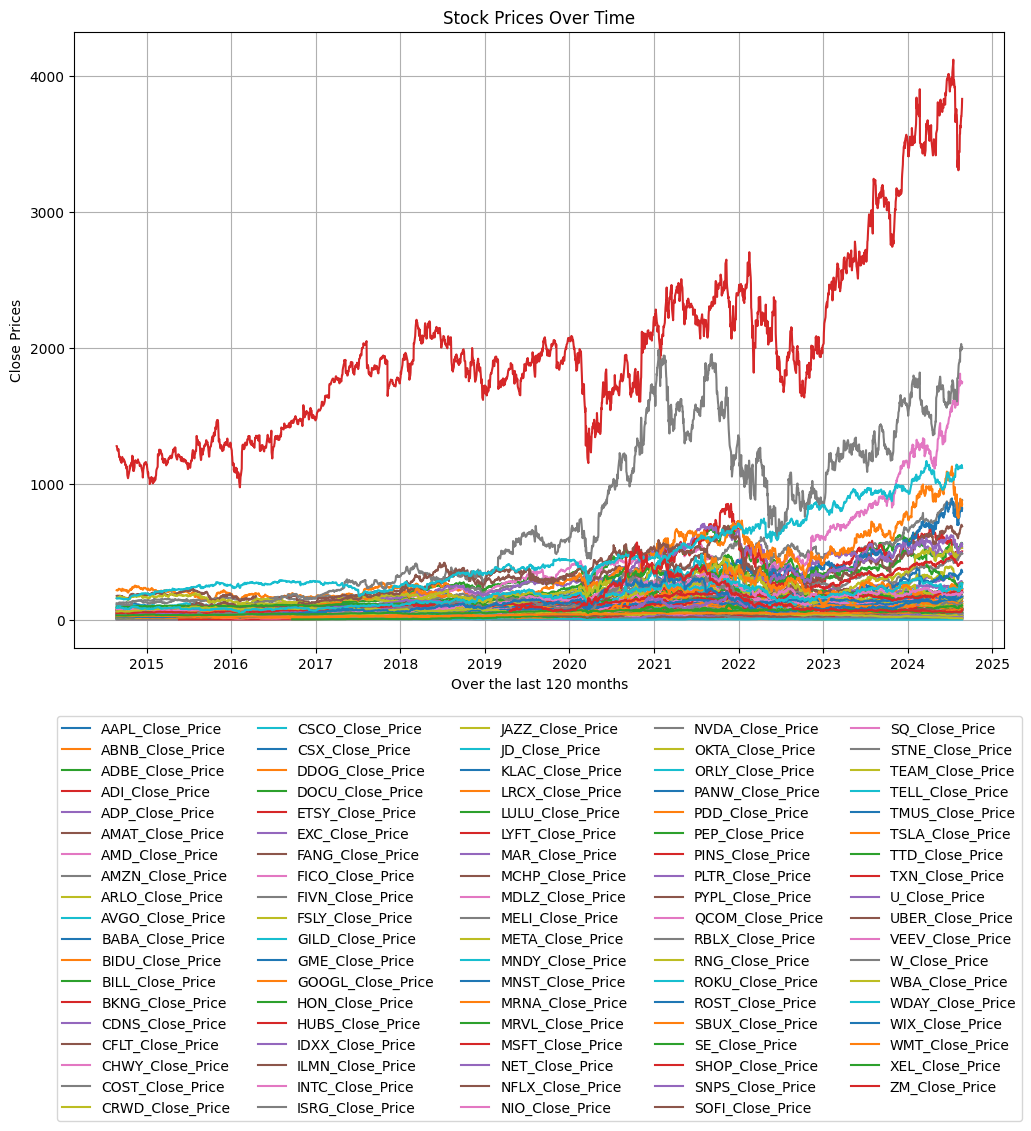

In [3]:
# Selecting date, symbol, close
price_data_frame = price_data_frame[["date", "symbol", "close"]]

# Pivot to have date as index and symbols as columns, and close price as values
price_data_frame = price_data_frame.pivot(
    index="date",
    columns="symbol",
    values="close"
)
print(price_data_frame.head())

# Plotting
plt.figure(figsize=(12, 8))
for symbol in price_data_frame.columns:
    plt.plot(price_data_frame.index, price_data_frame[symbol], label=f'{symbol}_Close_Price')

# Adding labels and title
plt.xlabel(f"Over the last {num_months} months")
plt.ylabel('Close Prices')
plt.title('Stock Prices Over Time')
plt.legend(ncol=5, bbox_to_anchor=(0.5, -0.1), loc='upper center')
plt.grid(True)

# Show the plot
plt.show()

Sharpe Ratio:

\begin{equation*}
\text{Sharpe Ratio} = \frac{(R_p - R_f)}{\sigma_p}
\end{equation*}

$
\begin{align}
\ R_p & = \text{Return of Portfolio} \\
\ R_f & = \text{Risk-Free Rate} \\
\ \sigma_p & = \text{Standard Deviation of Portfolio"s Excess Return} \\
\end{align}
$

Return of Portfolio:

\begin{equation*}
\ R_p = (w_{1}r_{1}) + (w_{2}r_{2}) + \cdots + (w_{n}r_{n})
\end{equation*}

$
\begin{align}
\ r_{i} & = \text{Return of Security i} \\
\ w_{i} & = \text{Weight of Security i} \\
\end{align}
$

Standard Deviation of Portfolio"s Excess Return:

\begin{equation*}
\ \sigma_p = \sqrt{(w_{i}^2 \sigma_i^2) + (w_{j}^2 \sigma_j^2) + (2w_{j}w_{i} p_{i,j} \sigma_i \sigma_j)}
\end{equation*}
$
\begin{align}
\ \sigma_{i} & = \text{Standard Deviation of Returns for Security i} \\
\ w_{i} & = \text{Weight of Security i} \\
\ p_{i,j} & = \text{Correlation Coefficent between the returns of asset i and asset j} \\
\end{align}
$

In [4]:
# Calculate Log Returns
log_return = np.log(1 + price_data_frame.pct_change())

# Drop NaN values that might have appeared after calculating percentage changes
log_return = log_return.dropna()

Selected top 10 stocks: ['NVDA', 'AVGO', 'FICO', 'COST', 'ORLY', 'PANW', 'KLAC', 'WMT', 'CDNS', 'SNPS', 'FANG', 'AAPL', 'BKNG', 'MSFT', 'MAR', 'ISRG', 'AMD', 'ADP', 'TMUS', 'ARLO', 'META', 'AMAT', 'ADI', 'UBER', 'GOOGL']


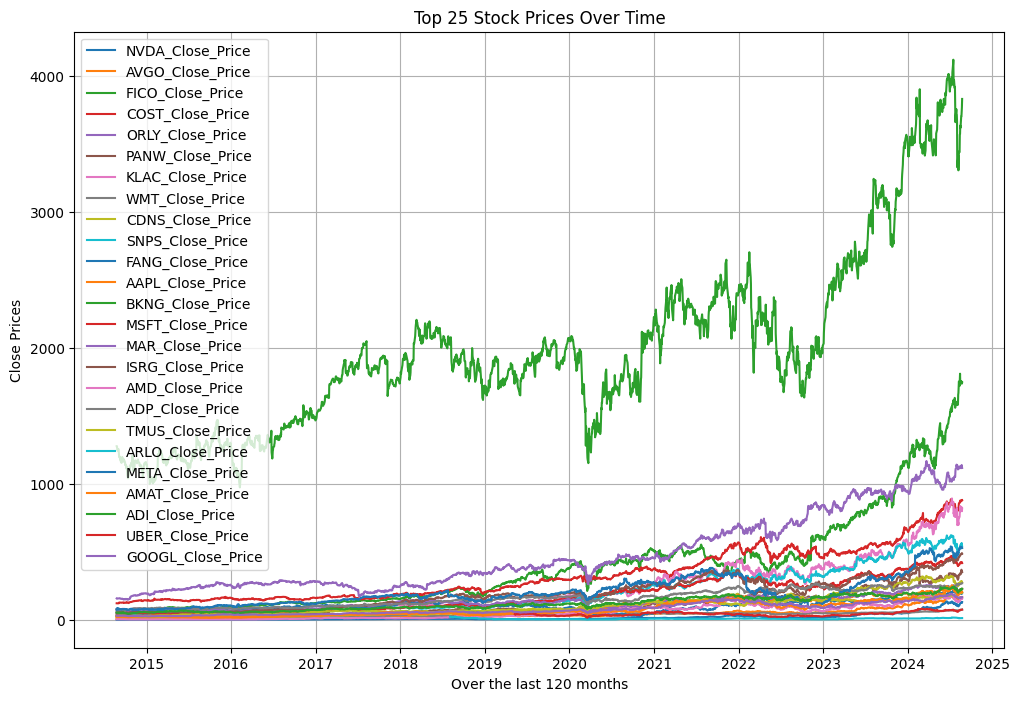

In [5]:
# ======================
# Calculate metrics for each stock and select the top x stocks
# ======================

# Define Top stocks
num_top_stocks = 25
# top_stocks = 10
top_stocks_header = num_top_stocks

# Calculate metrics for each stock
stock_metrics = pd.DataFrame(index=symbols)

# Annualized Return (mean of log returns * 252 trading days)
stock_metrics['Annualized Return'] = log_return.mean() * 252

# Annualized Volatility (std of log returns * sqrt(252 trading days))
stock_metrics['Annualized Volatility'] = log_return.std() * np.sqrt(252)

# Sharpe Ratio (Annualized Return - Risk Free Rate) / Annualized Volatility
stock_metrics['Sharpe Ratio'] = (stock_metrics['Annualized Return'] - rfr) / stock_metrics['Annualized Volatility']

# Sort stocks by Sharpe Ratio in descending order and select the top stocks
top_stocks = stock_metrics.sort_values(by='Sharpe Ratio', ascending=False).head(num_top_stocks)

# Update the symbols list with the top 10 stocks
symbols = top_stocks.index.tolist()

# Now you can redefine the number of symbols and proceed with Monte Carlo simulation
number_of_symbols = len(symbols)

print(f"Selected top 10 stocks: {symbols}")

# Plotting
plt.figure(figsize=(12, 8))
for symbol in price_data_frame[symbols].columns:  # <-- Adjusted to only plot the top 10 selected stocks
    plt.plot(price_data_frame.index, price_data_frame[symbol], label=f'{symbol}_Close_Price')

# Adding labels and title
plt.xlabel(f"Over the last {num_months} months")
plt.ylabel('Close Prices')
plt.title(f'Top {top_stocks_header} Stock Prices Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# =====================

In [6]:

# Generate Random Weights for the number of different stocks in our Portfolio
random_weights = np.array(np.random.random(number_of_symbols))

# Rebalanced sum of weights to 1
rebalanced_weights = random_weights / np.sum(random_weights)

print(rebalanced_weights)

# Calcualte the Expected Returns (annualized at 252 trading days)
exp_ret = np.sum((log_return[symbols].mean() * rebalanced_weights) * 252)

# Calculate Expected Volatility (annualized at 252 trading days)
exp_vol = np.sqrt(
    np.dot(
        rebalanced_weights.T,
        np.dot(
            log_return[symbols].cov() * 252,
            rebalanced_weights
        )
    )
)

# Calculate Sharpe Ratio with risk free rate
sharpe_ratio = (exp_ret - rfr) / exp_vol

[0.02629245 0.03103702 0.02544835 0.03917441 0.05193469 0.01088814
 0.06230164 0.03583252 0.03739439 0.06158948 0.00466304 0.03528625
 0.01945015 0.08831287 0.05172023 0.01446678 0.08023011 0.01473466
 0.03152325 0.02161903 0.05418629 0.06143447 0.07656283 0.0278446
 0.03607234]


In [7]:
exp_ret = np.sum((log_return[symbols].mean() * rebalanced_weights) * 252)

# Calculate Expected Volatility (annualized at 252 trading days)
exp_vol = np.sqrt(
    np.dot(
        rebalanced_weights.T,
        np.dot(
            log_return[symbols].cov() * 252,
            rebalanced_weights
        )
    )
)

# Calculate Sharpe Ratio with risk free rate
sharpe_ratio = (exp_ret - rfr) / exp_vol

In [8]:
# Create data frame for weights
weights_df = pd.DataFrame(data={
    "random_weights": random_weights,
    "rebalanced_weights": rebalanced_weights,
})
print("")
print("="*80)
print("PORTFOLIO WEIGHTS")
print("-"*80)
print(weights_df)
print("-"*80)

# Create data frame for weights
metrics_df = pd.DataFrame(data={
    "Expected Portfolio Returns": exp_ret,
    "Expected Portfolio Volatiltiy": exp_vol,
    "Portfolio Sharpe Ratio": sharpe_ratio
}, index=[0])

print("")
print("="*80)
print("PORTFOLIO METRICS")
print("-"*80)
print(metrics_df)
print("-"*80)


PORTFOLIO WEIGHTS
--------------------------------------------------------------------------------
    random_weights  rebalanced_weights
0         0.286593            0.026292
1         0.338310            0.031037
2         0.277392            0.025448
3         0.427009            0.039174
4         0.566098            0.051935
5         0.118683            0.010888
6         0.679100            0.062302
7         0.390581            0.035833
8         0.407606            0.037394
9         0.671337            0.061589
10        0.050828            0.004663
11        0.384627            0.035286
12        0.212010            0.019450
13        0.962628            0.088313
14        0.563761            0.051720
15        0.157691            0.014467
16        0.874524            0.080230
17        0.160611            0.014735
18        0.343610            0.031523
19        0.235652            0.021619
20        0.590641            0.054186
21        0.669648            0.061434
22 

In [9]:
# Define quantity of simulations
num_of_portfolios = 10000

# Define risk free rate
rfr = 0.05

# Prep Weight Array of Numpy Zeros to store simulation results
all_weights = np.zeros((num_of_portfolios, number_of_symbols))

# Prep Returns Array of Numpy Zeros to store simulation results
ret_arr = np.zeros((num_of_portfolios))

# Prep Volatility Array of Numpy Zeros to store simulation resultsps
vol_arr = np.zeros((num_of_portfolios))

# Prep Sharpe Ratio Array of Numpy Zeros to store simulation results
sharpe_arr = np.zeros((num_of_portfolios))

# # Begin simulation
# for ind in range(num_of_portfolios):

#     # Generate random weights on each iteration; Sum of weights needs to be equal to 1
#     weights = np.array(np.random.random(number_of_symbols))
#     weights = weights / np.sum(weights)

#     # Add the weights to the `weights_array`
#     all_weights[ind, :] = weights

#     # Calculate Expected Log Returns (annualized)
#     ret_arr[ind] = np.sum((log_return[symbols].mean() * weights) * 252)

#     # Calculate Volatility and add to `vol_arr`
#     vol_arr[ind] = np.sqrt(
#         np.dot(weights.T, np.dot(log_return[symbols].cov() * 252, weights))
#     ) 

#     # Calculate Sharpe Ratio
#     sharpe_arr[ind] = (ret_arr[ind] - rfr) / vol_arr[ind]

# Begin simulation
weight_limit = 0.15 # max ticker weight in portfolio
for ind in range(num_of_portfolios):

    # Initialize weights array
    weights = np.zeros(number_of_symbols)

    # Loop until all weights satisfy the condition
    while True:
        # Generate random weights on each iteration; Sum of weights needs to be equal to 1
        weights = np.random.random(number_of_symbols)
        weights = weights / np.sum(weights)

        # Check if all weights are within the limit
        if np.all(weights <= weight_limit):
            break

    # Add the weights to the `weights_array`
    all_weights[ind, :] = weights

    # Calculate Expected Log Returns (annualized)
    ret_arr[ind] = np.sum((log_return[symbols].mean() * weights) * 252)

    # Calculate Volatility and add to `vol_arr`
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_return[symbols].cov() * 252, weights))
    )

    # Calculate Sharpe Ratio
    sharpe_arr[ind] = (ret_arr[ind] - rfr) / vol_arr[ind]

# Combine arrays
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

# Create a dataframe from the master array
simulations_df = pd.DataFrame(data=simulations_data).T

# Add column Names
simulations_df.columns = [
    "Returns",
    "Volatility",
    "Sharpe Ratio",
    "Portfolio Weights"
]

# Check data types of simulations_df
simulations_df = simulations_df

# Print out simulation dataframe
print("")
print("="*80)
print("Simulation Result")
print("-"*80)
print(simulations_df.head())
print("-"*80)



Simulation Result
--------------------------------------------------------------------------------
    Returns Volatility Sharpe Ratio                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Portfolio Weights
0  0.193362   0.234433     0.611525        [0.01736402661744191, 0.06601647302336403, 0.03234576063545656, 0.03290907094525575, 0.00228241362528612, 0.04277274344536151, 0.04707975196377623, 0.0429716104206332, 0.04447187314935318, 0.037375614766218555, 0.003947693908801561, 0.004400465684657198, 0.025447477229322637, 0.076

In [10]:
simulations_df

,Returns,Volatility,Sharpe Ratio,Portfolio Weights
0,0.193362,0.234433,0.611525,"[0.01736402661744191, 0.06601647302336403, 0.03234576063545656, 0.03290907094525575, 0.00228241362528612, 0.04277274344536151, 0.04707975196377623, 0.0429716104206332, 0.04447187314935318, 0.037375614766218555, 0.003947693908801561, 0.004400465684657198, 0.025447477229322637, 0.07645905474538675, 0.05681849982909685, 0.03963910444647757, 0.044881601134319146, 0.06804482045433884, 0.07640706828321375, 0.02057307873727014, 0.017073534282783107, 0.019965720227349586, 0.05926526093551103, 0.07878474296983423, 0.04270253853949066]"
1,0.193871,0.253824,0.566813,"[0.02184116199081809, 0.07007106899195276, 0.014489057974549982, 0.058805709575673916, 0.03677142744818366, 0.00521878147797458, 0.04085803387134684, 0.023853086959203212, 0.0066657323262034884, 0.06824048527851985, 0.01509511041746093, 0.038004476538109934, 0.01664650266861707, 0.042035566688244465, 0.06543921128545609, 0.048085257070289746, 0.06333054102649556, 0.03012650013767229, 0.027813038081629236, 0.006233283116610899, 0.061784510811689425, 0.08761731080821716, 0.050717722905421384, 0.07059678375753685, 0.02965963879212275]"
2,0.184694,0.237065,0.568176,"[0.014696852283261829, 0.036110492219259736, 0.001533078169114555, 0.05718415944536106, 0.03749498366402124, 0.03785612144954973, 0.015904213635863158, 0.02463102873127279, 0.04438033758936972, 0.05051281490177462, 0.04317261021558916, 0.06271399328964156, 0.0002604706545172138, 0.06477284180370059, 0.016185555975241524, 0.06104990239651639, 0.04007912537388302, 0.009060479871901762, 0.0685661113101917, 0.06441619000237371, 0.04415020655748313, 0.061649876079494334, 0.03306043200994977, 0.03543434260092743, 0.07512377976974016]"
3,0.214108,0.22743,0.721577,"[0.04380858218107806, 0.06223027233480159, 0.03159341704323109, 0.04041143400627055, 0.06678861491777136, 0.044434194006062064, 0.011130568346698465, 0.043252207309635006, 0.05485192416922012, 0.05950348666223888, 0.06470741168058636, 0.011564965980566824, 0.013504957996339068, 0.03371720022082116, 0.009147536598611878, 0.03688980843844361, 0.03352698241962435, 0.018128118303936167, 0.06939713631745413, 0.016458751967970184, 0.05139818092833529, 0.006945728616178881, 0.06243726272556605, 0.06017687111222252, 0.05399438571633632]"
4,0.228326,0.241855,0.737328,"[0.044389303893115795, 0.06443592906736759, 0.06210838768776651, 0.028847446809997856, 0.034380947287919274, 0.016884025107037477, 0.06316210685852863, 0.04335889555970111, 0.06458845994807041, 0.019439246688229377, 0.061553079131313575, 0.03732990426403653, 0.04699100363726609, 0.04239232561806388, 0.019488280877855733, 0.056558723741663645, 0.06132476656490228, 0.06595739298051112, 0.008206253323302862, 0.05160320199743375, 0.04010410052871463, 0.002718284891849718, 0.041466392181499966, 0.00965787506363964, 0.013053666290212498]"
...,...,...,...,...
9995,0.218583,0.258948,0.651031,"[0.0698023652510243, 0.03125652543869019, 0.03938539985487225, 0.009125000339325631, 0.028548520736237773, 0.02175951308191864, 0.056026772693635735, 0.03291212739172751, 0.026582693045572182, 0.06620159828993077, 0.03705246269582755, 0.06815368453874213, 0.024507462723721833, 0.061245791383469445, 0.04341200070020528, 0.05893168384557581, 0.05052089969171508, 0.013455001844362276, 0.02218315372490402, 0.03209807797957126, 0.013603223752915198, 0.05944157767399744, 0.06412608686694024, 0.058495636586567014, 0.011172739868550345]"
9996,0.2008,0.226641,0.665372,"[0.0007785916980649593, 0.05705719924926278, 0.05708444216204887, 0.03747201750437694, 0.027623708308013997, 0.04352564234417982, 0.052177086871265155, 0.053457740936950604, 0.000467872591542722, 0.052425120735850594, 0.04789895170249058, 0.06632184709002793, 0.04389759386159452, 0.059797846366261516, 0.042761895763280516, 0.04386405016600133, 0.0034115078371317717, 0.025696751168478044, 0.03561229941275071, 0.0351439112254372, 0.05590696573757924, 0.04114366477158827, 0.005158632151218037, 0.

In [11]:
# Find Max Sharpe Ratio
max_sharpe_ratio = simulations_df.loc[simulations_df["Sharpe Ratio"].idxmax()]

# Find Min Volatility
min_volatility = simulations_df.loc[simulations_df["Volatility"].idxmin()]

print("")
print("="*80)
print("Max Sharpe Ratio")
print("-"*80)
print(max_sharpe_ratio)
print("-"*80)

print("")
print("="*80)
print("Min Volatility")
print("-"*80)
print(min_volatility)
print("-"*80)


Max Sharpe Ratio
--------------------------------------------------------------------------------
Returns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             0.245031
Volatility                                                                                                                                                                                                                                                                                                                                              

In [12]:
# Assuming you have already calculated the log_return and identified max_sharpe_ratio and min_volatility

# Calculate the daily log returns of the maximum Sharpe ratio portfolio
max_sharpe_returns = log_return[symbols].dot(max_sharpe_ratio['Portfolio Weights'])

# Calculate the daily log returns of the minimum volatility portfolio
min_volatility_returns = log_return[symbols].dot(min_volatility['Portfolio Weights'])

# Define confidence level (e.g., 95% or 99%)
confidence_level = 0.95

# Calculate the VaR at the confidence level for the maximum Sharpe ratio portfolio
max_sharpe_VaR = np.percentile(max_sharpe_returns, (1 - confidence_level) * 100)
max_sharpe_VaR = -max_sharpe_VaR  # Convert VaR to a positive value since VaR typically represents a loss

# Calculate the VaR at the confidence level for the minimum volatility portfolio
min_vol_VaR = np.percentile(min_volatility_returns, (1 - confidence_level) * 100)
min_vol_VaR = -min_vol_VaR  # Convert VaR to a positive value since VaR typically represents a loss

# Print the VaR results for both portfolios
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level for Max Sharpe Ratio Portfolio: {max_sharpe_VaR:.2f}")
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level for Min Volatility Portfolio: {min_vol_VaR:.2f}")

# Summarize the metrics for the maximum Sharpe ratio portfolio
max_sharpe_metrics_df = pd.DataFrame(data={
    "Expected Portfolio Returns": max_sharpe_ratio['Returns'],
    "Expected Portfolio Volatility": max_sharpe_ratio['Volatility'],
    "Portfolio Sharpe Ratio": max_sharpe_ratio['Sharpe Ratio'],
    "Portfolio VaR (95%)": max_sharpe_VaR
}, index=[0])

# Summarize the metrics for the minimum volatility portfolio
min_volatility_metrics_df = pd.DataFrame(data={
    "Expected Portfolio Returns": min_volatility['Returns'],
    "Expected Portfolio Volatility": min_volatility['Volatility'],
    "Portfolio Sharpe Ratio": min_volatility['Sharpe Ratio'],
    "Portfolio VaR (95%)": min_vol_VaR
}, index=[0])

# Display the final metrics
print("")
print("="*80)
print("FINAL PORTFOLIO METRICS")
print("-"*80)
print("Maximum Sharpe Ratio Portfolio Metrics")
print(max_sharpe_metrics_df)
print("")
print("Minimum Volatility Portfolio Metrics")
print(min_volatility_metrics_df)
print("="*80)


Value at Risk (VaR) at 95.0% confidence level for Max Sharpe Ratio Portfolio: 0.02
Value at Risk (VaR) at 95.0% confidence level for Min Volatility Portfolio: 0.02

FINAL PORTFOLIO METRICS
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Metrics
   Expected Portfolio Returns  Expected Portfolio Volatility  Portfolio Sharpe Ratio  Portfolio VaR (95%)
0                    0.245031                       0.216116                0.902436             0.021161

Minimum Volatility Portfolio Metrics
   Expected Portfolio Returns  Expected Portfolio Volatility  Portfolio Sharpe Ratio  Portfolio VaR (95%)
0                    0.188164                        0.19625                0.704023             0.018833


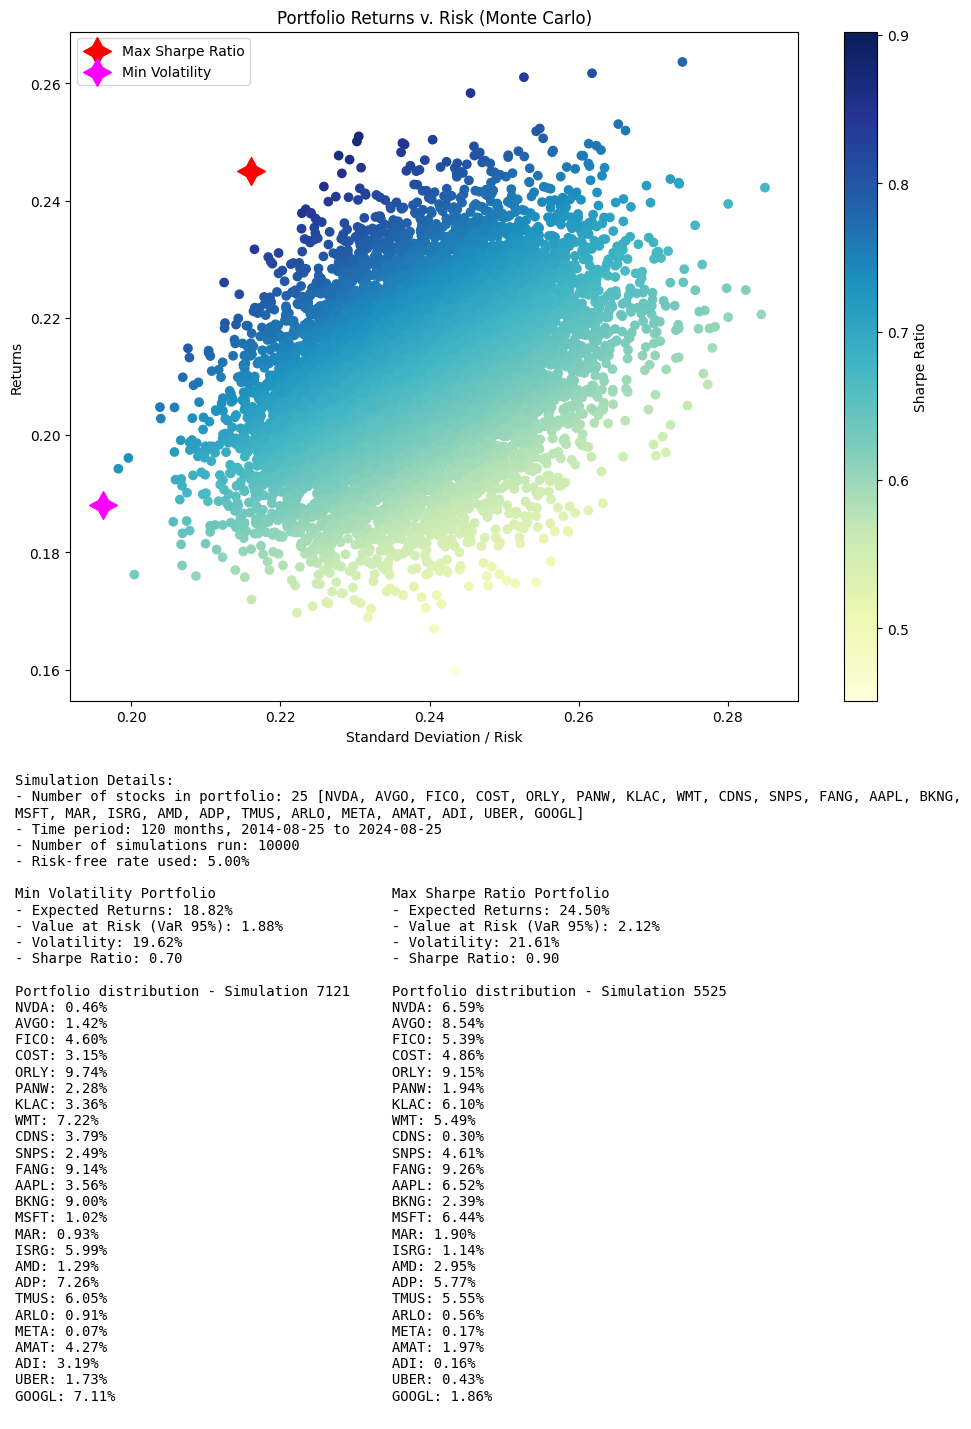

In [16]:
import matplotlib.pyplot as plt
import textwrap

# Calculate the number of lines of text based on your variables
num_lines_text = 6 + len(symbols) * 2  # Basic estimation

# Define a fixed gap between the plot and the text

def get_fixed_gap(num_stocks: int) -> float:
    if num_stocks >= 25:
        return 2.5
    elif num_stocks >= 15:
        return 1.5
    return 0.5

fixed_gap = get_fixed_gap(num_top_stocks)  # This is the vertical space between the plot and the details text

# Adjust the figure height accordingly (base height + additional height for text + gap)
fig_height = 6 + fixed_gap
plt.figure(figsize=(10, fig_height))

# Plot data on Scatter Plot, Portfolio Returns vs Risk
plt.scatter(
    y=simulations_df["Returns"],
    x=simulations_df["Volatility"],
    c=simulations_df["Sharpe Ratio"],
    cmap="YlGnBu"
)

# Add Title, Colorbar, x-axis, y-axis labels
plt.title("Portfolio Returns v. Risk (Monte Carlo)")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Standard Deviation / Risk")
plt.ylabel("Returns")

# Plot Max Sharpe Ratio using a red star
plt.scatter(
    max_sharpe_ratio["Volatility"],
    max_sharpe_ratio["Returns"],
    marker=(4, 1, 0),
    color="r",
    s=400,  # Size of the star marker
    label="Max Sharpe Ratio"
)

# Plot Min Volatility using a magenta star
plt.scatter(
    min_volatility["Volatility"],
    min_volatility["Returns"],
    marker=(4, 1, 0),
    color="magenta",
    s=400,  # Size of the star marker
    label="Min Volatility"
)

# Restore the legend to its original position
plt.legend(loc='upper left')

# Convert the list of symbols into a comma-separated string
stock_list = ", ".join(symbols)

# Extract the index (simulation number) for min volatility and max Sharpe ratio portfolios
min_volatility_simulation_number = min_volatility.name
max_sharpe_simulation_number = max_sharpe_ratio.name

# Define metrics for Min Volatility and Max Sharpe Ratio portfolios
min_volatility_metrics = [
    f"- Expected Returns: {min_volatility['Returns']:.2%}",
    f"- Value at Risk (VaR {int(confidence_level * 100)}%): {min_vol_VaR:.2%}",
    f"- Volatility: {min_volatility['Volatility']:.2%}",
    f"- Sharpe Ratio: {min_volatility['Sharpe Ratio']:.2f}",
    "",  # Insert a blank line to create a gap
    f"Portfolio distribution - Simulation {min_volatility_simulation_number}"
] + [f"{symbol}: {weight:.2%}" for symbol, weight in zip(symbols, min_volatility['Portfolio Weights'])]

max_sharpe_metrics = [
    f"- Expected Returns: {max_sharpe_ratio['Returns']:.2%}",
    f"- Value at Risk (VaR {int(confidence_level * 100)}%): {max_sharpe_VaR:.2%}",
    f"- Volatility: {max_sharpe_ratio['Volatility']:.2%}",
    f"- Sharpe Ratio: {max_sharpe_ratio['Sharpe Ratio']:.2f}",
    "",  # Insert a blank line to create a gap
    f"Portfolio distribution - Simulation {max_sharpe_simulation_number}"
] + [f"{symbol}: {weight:.2%}" for symbol, weight in zip(symbols, max_sharpe_ratio['Portfolio Weights'])]

# Calculate the necessary padding
max_len_left = max(len(line) for line in min_volatility_metrics)
max_len_right = max(len(line) for line in max_sharpe_metrics)
column_padding = 5

# Create headers
header_left = "Min Volatility Portfolio"
header_right = "Max Sharpe Ratio Portfolio"

# Adjust headers with padding
header_left = f"{header_left:<{max_len_left}}"
header_right = f"{header_right:<{max_len_right}}"

# Combine headers into a single row
header_row = f"{header_left}{' ' * column_padding}{header_right}\n"

# Create the data rows
data_rows = ""
for left, right in zip(min_volatility_metrics, max_sharpe_metrics):
    left_padded = f"{left:<{max_len_left}}"
    right_padded = f"{right:<{max_len_right}}"
    data_rows += f"{left_padded}{' ' * column_padding}{right_padded}\n"

# Combine header and data rows
table_text = header_row + data_rows

# Wrap the string about the number of stocks to fit the plot width
wrapped_stock_list = textwrap.fill(stock_list, width=80)

# Add simulation details text below the plot, aligned to the left
simulation_details = (
    "Simulation Details:\n"
    f"- Number of stocks in portfolio: {len(symbols)} [{wrapped_stock_list}]\n"
    f"- Time period: {num_months} months, {from_date} to {to_date}\n"
    f"- Number of simulations run: {num_of_portfolios}\n"
    f"- Risk-free rate used: {rfr:.2%}\n\n"
    f"{table_text}"
)

# Position the text below the plot
text_y_position = -fig_height / 11
plt.gcf().text(0.02, text_y_position, simulation_details, fontfamily='monospace', ha="left", color="black")

# Adjust the layout to ensure the text does not overlap with the plot
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust the rect to leave space for the text

# Show Plot
plt.show()
